In [69]:
%load_ext autoreload

%autoreload 2
import numpy as np
import corner, sys
import getdist
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.append('../../modules/')
import numpy as np
#plt.switch_backend("Qt5Agg")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
names = ['1', '2','3','4','5']
labels = [r'\Omega_m', r'\sigma_8', r'\alpha_\lambda', r'\beta_\lambda',r'\sigma_\lambda']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':4, 'smooth_scale_1D':4, 'boundary_correction_order':0}

In [80]:
n_cut=450000
path = '../../capish_sbi_data/config_sbi_baseline_standard_prior_5_params/samples_of_{}_posterior_with_data_flagship_like_sim.pkl'

t = np.load(path.format('count_Nm'), allow_pickle = True)
N_Nm = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count+Nm ($\sigma_{\rm WL} = 0.2$)')

t = np.load(path.format('count'), allow_pickle = True)
N = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='count')

t = np.load(path.format('Nm'), allow_pickle = True)
Nm = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'Nm')

Removed no burn in
Removed no burn in
Removed no burn in


In [81]:
path = '../../capish_sbi_data/config_sbi_theory_sigma_Mwl_gal_standard_prior_5_params/samples_of_{}_posterior_with_data_flagship_like_sim.pkl'

t = np.load(path.format('count_Nm'), allow_pickle = True)
N_Nm_theory_sigmaMwl = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=r'count+Nm ($\sigma_{\rm WL} = $ model)')


Removed no burn in


In [88]:
path = '../../capish_sbi_data/config_sbi_power_law_standard_prior_5_params/samples_of_{}_posterior_with_data_flagship_like_sim.pkl'

t = np.load(path.format('count_Nm'), allow_pickle = True)
N_Nm_power_law = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='count+Nm (power law relation)')


Removed no burn in


In [100]:
path = '../../capish_sbi_data/config_sbi_power_law_log10Mwl_standard_prior_5_params/samples_of_{}_posterior_with_data_flagship_like_sim.pkl'

t = np.load(path.format('count_Nm'), allow_pickle = True)
N_Nm_power_law_log10Mwl = MCSamples(samples=t[n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='count+Nm (power law relation + log10Mwl)')

Removed no burn in


In [89]:
t = np.load(path.format('count_Nm'), allow_pickle = True)

In [95]:
params_fid=[0.319,0.813,-9.348,0.75,0.3]
#params_fid=[0.319,0.813,3.5,0.8,0.3]

In [96]:
markers={f'{i+1}':params_fid[i] for i in range(len(params_fid))}

In [97]:
markers

{'1': 0.319, '2': 0.813, '3': 3.5, '4': 0.8, '5': 0.3}

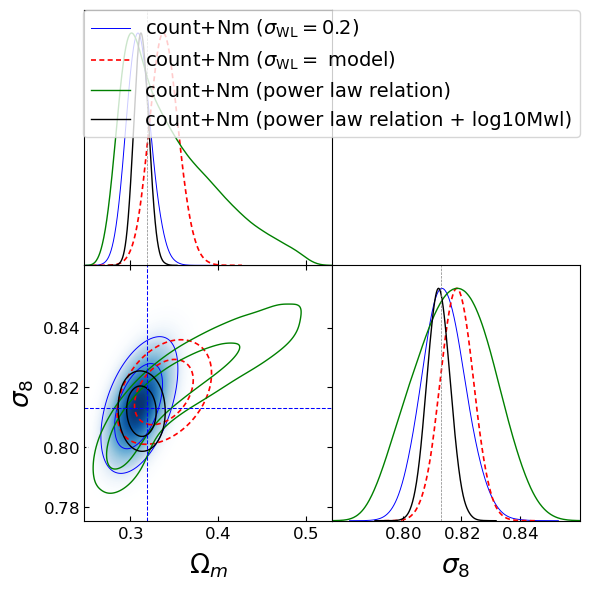

In [105]:
g = plots.get_subplot_plotter(subplot_size=3)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
range_ = {'1':[2.5,4], '2':[-2,2], '3':[1,4], '4':[0.1,1.2],'5':[-1.5,1.5], '6':[-0.5,0.5], }
g.triangle_plot(
                [N_Nm, N_Nm_theory_sigmaMwl,N_Nm_power_law, N_Nm_power_law_log10Mwl], 
                filled=[False, False, False, False, False], 
                contour_colors = ['b', 'r', 'g', 'k', 'r', 'k' ], 
                contour_ls=['-','--','-', '-', '-'],
                contour_lws=[0.7,1.2,1,1,2],shaded=True,
                legend_fontsize = 10,
                params=['1','2'],
                markers=markers,
                fine_bins = 5,  
                marker_args = marker_args)
#plt.savefig(f'mcmc_SBI.png', dpi = 300)